In [3]:
from __future__ import absolute_import, division, print_function
from matplotlib.font_manager import _rebuild; _rebuild()
#Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as spio
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler
from yellowbrick.classifier import ROCAUC, PrecisionRecallCurve
import random
import sys

In [5]:
# Save all output to file.
# sys.stdout = open("parameter_logging.txt","w")

# Initialize random number generator for reproducibility.
seed = 7
np.random.seed(seed)

# Load in dataset.

data = spio.loadmat("features_10s_2019-01-30.mat");
features = data['features'];
labels = data['labels_features'];
animal_id_features = data['animal_id_features'].transpose();
animal_names = data['animal_names'].transpose();
feat_names = data['feat_names'];
col_names = pd.DataFrame(feat_names)
# Label each feature column with its description.
def find_between(s):
    start = '\'';
    end = '\'';
    return((s.split(start))[1].split(end)[0])
cols = [];
c_names = col_names.values.ravel();

for x in range(len(c_names)):
    name = str (c_names[x]);
    cols.append(find_between(name))

# Create a DataFrame of features with columns named & rows labeled.
feat_data = pd.DataFrame(data=features,columns=cols)
feat_data.insert(0,'AnimalId',animal_id_features)
feat_data.insert(0,'Labels',labels.transpose())

# Randomly select an animal to leave out.
index = random.randint(1,12);
print("Animal chosen: %s" % animal_names[index - 1][0])

# Select the features corresponding to one animal.
def get_single_animal_features(df, index) :
    return df.loc[df['AnimalId'] == index]

# Delete the rows corresponding to the animal left out.
def get_loo_features(df, index):
	df[df.AnimalId != index]
	return df

# Get features of 11/12 animals.
single_animal_features = get_single_animal_features(feat_data, index);
loo_features = get_loo_features(feat_data, index);

# Get only labels corresponding to first animal's features.
y = single_animal_features['Labels']
X = single_animal_features.drop(columns={'Labels','AnimalId'})

"""Split data into training and testing for cross-validation."""
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2);

"""Standardize the data since the MLP is sensitive to feature scaling."""
scaler = StandardScaler()
# Fit only to the training data.
scaler.fit(X_train)
# Apply the transformations to the data.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the model with constant iteration max = 500.
mlp = MLPClassifier(
    max_iter=1500,
    verbose=51,
    tol=0.000001, 
    learning_rate='constant',
    alpha=0.001,
    solver='adam',
    batch_size=512,
    activation='tanh')

# Run model with 4-fold cross validation. Report mean accuracy.
scores = cross_val_score(mlp, X_train, y_train, cv=4)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Animal chosen: ['fKH57']
Iteration 1, loss = 0.65750467
Iteration 2, loss = 0.45013103
Iteration 3, loss = 0.37444231
Iteration 4, loss = 0.31067258
Iteration 5, loss = 0.27521384
Iteration 6, loss = 0.24844033
Iteration 7, loss = 0.23018489
Iteration 8, loss = 0.21637280
Iteration 9, loss = 0.20536754
Iteration 10, loss = 0.19657076
Iteration 11, loss = 0.18961847
Iteration 12, loss = 0.18251589
Iteration 13, loss = 0.17764845
Iteration 14, loss = 0.17275601
Iteration 15, loss = 0.16950659
Iteration 16, loss = 0.16619124
Iteration 17, loss = 0.16230164
Iteration 18, loss = 0.15995792
Iteration 19, loss = 0.15684458
Iteration 20, loss = 0.15434485
Iteration 21, loss = 0.15219670
Iteration 22, loss = 0.14995774
Iteration 23, loss = 0.14813810
Iteration 24, loss = 0.14614845
Iteration 25, loss = 0.14446575
Iteration 26, loss = 0.14286856
Iteration 27, loss = 0.14136312
Iteration 28, loss = 0.14022607
Iteration 29, loss = 0.13848927
Iteration 30, loss = 0.13746857
Iteration 31, loss = 0.1

Iteration 267, loss = 0.00832414
Iteration 268, loss = 0.00829575
Iteration 269, loss = 0.00857309
Iteration 270, loss = 0.00812751
Iteration 271, loss = 0.00803454
Iteration 272, loss = 0.00769131
Iteration 273, loss = 0.00763030
Iteration 274, loss = 0.00754825
Iteration 275, loss = 0.00744706
Iteration 276, loss = 0.00758355
Iteration 277, loss = 0.00724081
Iteration 278, loss = 0.00723658
Iteration 279, loss = 0.00706895
Iteration 280, loss = 0.00708821
Iteration 281, loss = 0.00687518
Iteration 282, loss = 0.00689406
Iteration 283, loss = 0.00683290
Iteration 284, loss = 0.00666819
Iteration 285, loss = 0.00658856
Iteration 286, loss = 0.00658569
Iteration 287, loss = 0.00644916
Iteration 288, loss = 0.00640039
Iteration 289, loss = 0.00631145
Iteration 290, loss = 0.00637918
Iteration 291, loss = 0.00623899
Iteration 292, loss = 0.00612378
Iteration 293, loss = 0.00601917
Iteration 294, loss = 0.00595216
Iteration 295, loss = 0.00610549
Iteration 296, loss = 0.00595061
Iteration 

Iteration 518, loss = 0.00123867
Iteration 519, loss = 0.00123818
Iteration 520, loss = 0.00122463
Iteration 521, loss = 0.00122260
Iteration 522, loss = 0.00121979
Iteration 523, loss = 0.00121114
Iteration 524, loss = 0.00120757
Iteration 525, loss = 0.00120970
Iteration 526, loss = 0.00121083
Iteration 527, loss = 0.00120173
Iteration 528, loss = 0.00119001
Iteration 529, loss = 0.00119337
Iteration 530, loss = 0.00119030
Iteration 531, loss = 0.00118244
Iteration 532, loss = 0.00117388
Iteration 533, loss = 0.00116976
Iteration 534, loss = 0.00116544
Iteration 535, loss = 0.00116656
Iteration 536, loss = 0.00115953
Iteration 537, loss = 0.00115789
Iteration 538, loss = 0.00115370
Iteration 539, loss = 0.00114684
Iteration 540, loss = 0.00114687
Iteration 541, loss = 0.00114290
Iteration 542, loss = 0.00113400
Iteration 543, loss = 0.00112897
Iteration 544, loss = 0.00112716
Iteration 545, loss = 0.00112357
Iteration 546, loss = 0.00112089
Iteration 547, loss = 0.00112332
Iteration 

Iteration 770, loss = 0.00072864
Iteration 771, loss = 0.00072715
Iteration 772, loss = 0.00072394
Iteration 773, loss = 0.00072337
Iteration 774, loss = 0.00072251
Iteration 775, loss = 0.00072369
Iteration 776, loss = 0.00072030
Iteration 777, loss = 0.00071989
Iteration 778, loss = 0.00071876
Iteration 779, loss = 0.00071906
Iteration 780, loss = 0.00071717
Iteration 781, loss = 0.00071820
Iteration 782, loss = 0.00071559
Iteration 783, loss = 0.00071484
Iteration 784, loss = 0.00071483
Iteration 785, loss = 0.00071377
Iteration 786, loss = 0.00071251
Iteration 787, loss = 0.00071369
Iteration 788, loss = 0.00071186
Iteration 789, loss = 0.00071054
Iteration 790, loss = 0.00070929
Iteration 791, loss = 0.00070833
Iteration 792, loss = 0.00070852
Iteration 793, loss = 0.00070728
Iteration 794, loss = 0.00070700
Iteration 795, loss = 0.00070519
Iteration 796, loss = 0.00070509
Iteration 797, loss = 0.00070493
Iteration 798, loss = 0.00070355
Iteration 799, loss = 0.00070525
Iteration 

Iteration 1030, loss = 0.00054814
Iteration 1031, loss = 0.00054839
Iteration 1032, loss = 0.00055483
Iteration 1033, loss = 0.00055563
Iteration 1034, loss = 0.00055024
Iteration 1035, loss = 0.00054715
Iteration 1036, loss = 0.00054529
Iteration 1037, loss = 0.00054396
Iteration 1038, loss = 0.00054300
Iteration 1039, loss = 0.00054249
Iteration 1040, loss = 0.00054327
Iteration 1041, loss = 0.00054301
Iteration 1042, loss = 0.00054182
Iteration 1043, loss = 0.00054225
Iteration 1044, loss = 0.00054104
Iteration 1045, loss = 0.00053939
Iteration 1046, loss = 0.00053842
Iteration 1047, loss = 0.00053921
Iteration 1048, loss = 0.00053961
Iteration 1049, loss = 0.00054123
Iteration 1050, loss = 0.00053886
Iteration 1051, loss = 0.00053801
Iteration 1052, loss = 0.00053748
Iteration 1053, loss = 0.00053726
Iteration 1054, loss = 0.00053371
Iteration 1055, loss = 0.00053302
Iteration 1056, loss = 0.00053313
Iteration 1057, loss = 0.00053193
Iteration 1058, loss = 0.00053204
Iteration 1059

Iteration 143, loss = 0.03852628
Iteration 144, loss = 0.03890553
Iteration 145, loss = 0.03702095
Iteration 146, loss = 0.03671668
Iteration 147, loss = 0.03623218
Iteration 148, loss = 0.03521440
Iteration 149, loss = 0.03503082
Iteration 150, loss = 0.03445161
Iteration 151, loss = 0.03414684
Iteration 152, loss = 0.03327410
Iteration 153, loss = 0.03290343
Iteration 154, loss = 0.03282064
Iteration 155, loss = 0.03281546
Iteration 156, loss = 0.03217228
Iteration 157, loss = 0.03233113
Iteration 158, loss = 0.03189179
Iteration 159, loss = 0.03116238
Iteration 160, loss = 0.03073410
Iteration 161, loss = 0.03009825
Iteration 162, loss = 0.03020302
Iteration 163, loss = 0.02895436
Iteration 164, loss = 0.02905408
Iteration 165, loss = 0.02961977
Iteration 166, loss = 0.02776198
Iteration 167, loss = 0.02735336
Iteration 168, loss = 0.02703611
Iteration 169, loss = 0.02661069
Iteration 170, loss = 0.02626851
Iteration 171, loss = 0.02564003
Iteration 172, loss = 0.02609780
Iteration 

Iteration 398, loss = 0.00220587
Iteration 399, loss = 0.00220115
Iteration 400, loss = 0.00220613
Iteration 401, loss = 0.00215868
Iteration 402, loss = 0.00213148
Iteration 403, loss = 0.00213165
Iteration 404, loss = 0.00212902
Iteration 405, loss = 0.00213095
Iteration 406, loss = 0.00208787
Iteration 407, loss = 0.00206408
Iteration 408, loss = 0.00205007
Iteration 409, loss = 0.00204923
Iteration 410, loss = 0.00204726
Iteration 411, loss = 0.00202101
Iteration 412, loss = 0.00201313
Iteration 413, loss = 0.00202885
Iteration 414, loss = 0.00199702
Iteration 415, loss = 0.00197293
Iteration 416, loss = 0.00196094
Iteration 417, loss = 0.00195142
Iteration 418, loss = 0.00198590
Iteration 419, loss = 0.00194204
Iteration 420, loss = 0.00191136
Iteration 421, loss = 0.00192861
Iteration 422, loss = 0.00189121
Iteration 423, loss = 0.00188264
Iteration 424, loss = 0.00185672
Iteration 425, loss = 0.00186189
Iteration 426, loss = 0.00184180
Iteration 427, loss = 0.00184004
Iteration 

Iteration 647, loss = 0.00087136
Iteration 648, loss = 0.00087268
Iteration 649, loss = 0.00086675
Iteration 650, loss = 0.00086583
Iteration 651, loss = 0.00086370
Iteration 652, loss = 0.00086397
Iteration 653, loss = 0.00086145
Iteration 654, loss = 0.00085894
Iteration 655, loss = 0.00085797
Iteration 656, loss = 0.00085625
Iteration 657, loss = 0.00085503
Iteration 658, loss = 0.00085241
Iteration 659, loss = 0.00085335
Iteration 660, loss = 0.00085041
Iteration 661, loss = 0.00084933
Iteration 662, loss = 0.00084715
Iteration 663, loss = 0.00084608
Iteration 664, loss = 0.00084637
Iteration 665, loss = 0.00084411
Iteration 666, loss = 0.00084269
Iteration 667, loss = 0.00084135
Iteration 668, loss = 0.00083869
Iteration 669, loss = 0.00083806
Iteration 670, loss = 0.00083778
Iteration 671, loss = 0.00083683
Iteration 672, loss = 0.00083438
Iteration 673, loss = 0.00083487
Iteration 674, loss = 0.00083510
Iteration 675, loss = 0.00083103
Iteration 676, loss = 0.00082816
Iteration 

Iteration 910, loss = 0.00062657
Iteration 911, loss = 0.00062541
Iteration 912, loss = 0.00062614
Iteration 913, loss = 0.00062540
Iteration 914, loss = 0.00062378
Iteration 915, loss = 0.00062352
Iteration 916, loss = 0.00062327
Iteration 917, loss = 0.00062226
Iteration 918, loss = 0.00062143
Iteration 919, loss = 0.00062043
Iteration 920, loss = 0.00062010
Iteration 921, loss = 0.00062024
Iteration 922, loss = 0.00061974
Iteration 923, loss = 0.00062374
Iteration 924, loss = 0.00062281
Iteration 925, loss = 0.00062048
Iteration 926, loss = 0.00061640
Iteration 927, loss = 0.00061718
Iteration 928, loss = 0.00061472
Iteration 929, loss = 0.00061522
Iteration 930, loss = 0.00061370
Iteration 931, loss = 0.00061249
Iteration 932, loss = 0.00061118
Iteration 933, loss = 0.00061124
Iteration 934, loss = 0.00061148
Iteration 935, loss = 0.00061029
Iteration 936, loss = 0.00060888
Iteration 937, loss = 0.00060939
Iteration 938, loss = 0.00060901
Iteration 939, loss = 0.00060900
Iteration 

Iteration 105, loss = 0.06431865
Iteration 106, loss = 0.06486588
Iteration 107, loss = 0.06383262
Iteration 108, loss = 0.06247233
Iteration 109, loss = 0.06190643
Iteration 110, loss = 0.05994538
Iteration 111, loss = 0.05847207
Iteration 112, loss = 0.05804708
Iteration 113, loss = 0.05846212
Iteration 114, loss = 0.05762748
Iteration 115, loss = 0.05583888
Iteration 116, loss = 0.05562566
Iteration 117, loss = 0.05410894
Iteration 118, loss = 0.05490112
Iteration 119, loss = 0.05336821
Iteration 120, loss = 0.05239716
Iteration 121, loss = 0.05152057
Iteration 122, loss = 0.05108064
Iteration 123, loss = 0.05053540
Iteration 124, loss = 0.04995985
Iteration 125, loss = 0.04930151
Iteration 126, loss = 0.04821023
Iteration 127, loss = 0.04803984
Iteration 128, loss = 0.04707882
Iteration 129, loss = 0.04798560
Iteration 130, loss = 0.04776577
Iteration 131, loss = 0.04634265
Iteration 132, loss = 0.04539942
Iteration 133, loss = 0.04495711
Iteration 134, loss = 0.04434729
Iteration 

Iteration 359, loss = 0.00277841
Iteration 360, loss = 0.00274764
Iteration 361, loss = 0.00277648
Iteration 362, loss = 0.00271633
Iteration 363, loss = 0.00267524
Iteration 364, loss = 0.00266716
Iteration 365, loss = 0.00267331
Iteration 366, loss = 0.00262774
Iteration 367, loss = 0.00260924
Iteration 368, loss = 0.00259344
Iteration 369, loss = 0.00258914
Iteration 370, loss = 0.00254514
Iteration 371, loss = 0.00253350
Iteration 372, loss = 0.00250469
Iteration 373, loss = 0.00250971
Iteration 374, loss = 0.00247176
Iteration 375, loss = 0.00245487
Iteration 376, loss = 0.00244609
Iteration 377, loss = 0.00241014
Iteration 378, loss = 0.00241935
Iteration 379, loss = 0.00239852
Iteration 380, loss = 0.00239171
Iteration 381, loss = 0.00235586
Iteration 382, loss = 0.00233502
Iteration 383, loss = 0.00231446
Iteration 384, loss = 0.00230045
Iteration 385, loss = 0.00229049
Iteration 386, loss = 0.00226780
Iteration 387, loss = 0.00225216
Iteration 388, loss = 0.00225363
Iteration 

Iteration 614, loss = 0.00089728
Iteration 615, loss = 0.00089341
Iteration 616, loss = 0.00089223
Iteration 617, loss = 0.00089072
Iteration 618, loss = 0.00089255
Iteration 619, loss = 0.00089036
Iteration 620, loss = 0.00088989
Iteration 621, loss = 0.00088488
Iteration 622, loss = 0.00088119
Iteration 623, loss = 0.00088162
Iteration 624, loss = 0.00087929
Iteration 625, loss = 0.00087629
Iteration 626, loss = 0.00087581
Iteration 627, loss = 0.00087413
Iteration 628, loss = 0.00087198
Iteration 629, loss = 0.00087191
Iteration 630, loss = 0.00086989
Iteration 631, loss = 0.00086628
Iteration 632, loss = 0.00086504
Iteration 633, loss = 0.00086668
Iteration 634, loss = 0.00086294
Iteration 635, loss = 0.00086490
Iteration 636, loss = 0.00086146
Iteration 637, loss = 0.00086256
Iteration 638, loss = 0.00086028
Iteration 639, loss = 0.00085544
Iteration 640, loss = 0.00085260
Iteration 641, loss = 0.00085383
Iteration 642, loss = 0.00085146
Iteration 643, loss = 0.00084990
Iteration 

Iteration 864, loss = 0.00064239
Iteration 865, loss = 0.00064274
Iteration 866, loss = 0.00064262
Iteration 867, loss = 0.00064081
Iteration 868, loss = 0.00064101
Iteration 869, loss = 0.00063891
Iteration 870, loss = 0.00063872
Iteration 871, loss = 0.00063992
Iteration 872, loss = 0.00063757
Iteration 873, loss = 0.00063777
Iteration 874, loss = 0.00063759
Iteration 875, loss = 0.00063563
Iteration 876, loss = 0.00063536
Iteration 877, loss = 0.00063490
Iteration 878, loss = 0.00063380
Iteration 879, loss = 0.00063223
Iteration 880, loss = 0.00063255
Iteration 881, loss = 0.00063171
Iteration 882, loss = 0.00063009
Iteration 883, loss = 0.00062943
Iteration 884, loss = 0.00062838
Iteration 885, loss = 0.00062791
Iteration 886, loss = 0.00062752
Iteration 887, loss = 0.00062725
Iteration 888, loss = 0.00062604
Iteration 889, loss = 0.00062587
Iteration 890, loss = 0.00062461
Iteration 891, loss = 0.00062396
Iteration 892, loss = 0.00062354
Iteration 893, loss = 0.00062398
Iteration 

Iteration 180, loss = 0.02753616
Iteration 181, loss = 0.02653608
Iteration 182, loss = 0.02470175
Iteration 183, loss = 0.02420012
Iteration 184, loss = 0.02434938
Iteration 185, loss = 0.02394363
Iteration 186, loss = 0.02349735
Iteration 187, loss = 0.02318145
Iteration 188, loss = 0.02288253
Iteration 189, loss = 0.02321045
Iteration 190, loss = 0.02269338
Iteration 191, loss = 0.02275055
Iteration 192, loss = 0.02217335
Iteration 193, loss = 0.02131117
Iteration 194, loss = 0.02137600
Iteration 195, loss = 0.02123860
Iteration 196, loss = 0.02061065
Iteration 197, loss = 0.02045263
Iteration 198, loss = 0.02031549
Iteration 199, loss = 0.02013024
Iteration 200, loss = 0.01953952
Iteration 201, loss = 0.01941791
Iteration 202, loss = 0.01906588
Iteration 203, loss = 0.01851155
Iteration 204, loss = 0.01859150
Iteration 205, loss = 0.01825484
Iteration 206, loss = 0.01843618
Iteration 207, loss = 0.01818402
Iteration 208, loss = 0.01760432
Iteration 209, loss = 0.01727961
Iteration 

Iteration 438, loss = 0.00188296
Iteration 439, loss = 0.00187744
Iteration 440, loss = 0.00190452
Iteration 441, loss = 0.00185598
Iteration 442, loss = 0.00184621
Iteration 443, loss = 0.00183747
Iteration 444, loss = 0.00182054
Iteration 445, loss = 0.00182023
Iteration 446, loss = 0.00181564
Iteration 447, loss = 0.00179350
Iteration 448, loss = 0.00178327
Iteration 449, loss = 0.00177328
Iteration 450, loss = 0.00175661
Iteration 451, loss = 0.00174809
Iteration 452, loss = 0.00173825
Iteration 453, loss = 0.00172838
Iteration 454, loss = 0.00172211
Iteration 455, loss = 0.00171698
Iteration 456, loss = 0.00170560
Iteration 457, loss = 0.00169903
Iteration 458, loss = 0.00169645
Iteration 459, loss = 0.00169763
Iteration 460, loss = 0.00168757
Iteration 461, loss = 0.00166124
Iteration 462, loss = 0.00166544
Iteration 463, loss = 0.00164708
Iteration 464, loss = 0.00163334
Iteration 465, loss = 0.00162777
Iteration 466, loss = 0.00162330
Iteration 467, loss = 0.00161225
Iteration 

Iteration 693, loss = 0.00083054
Iteration 694, loss = 0.00082946
Iteration 695, loss = 0.00082824
Iteration 696, loss = 0.00082622
Iteration 697, loss = 0.00082481
Iteration 698, loss = 0.00082399
Iteration 699, loss = 0.00082125
Iteration 700, loss = 0.00082039
Iteration 701, loss = 0.00082059
Iteration 702, loss = 0.00081792
Iteration 703, loss = 0.00081814
Iteration 704, loss = 0.00081650
Iteration 705, loss = 0.00081619
Iteration 706, loss = 0.00081362
Iteration 707, loss = 0.00081275
Iteration 708, loss = 0.00081234
Iteration 709, loss = 0.00081094
Iteration 710, loss = 0.00081223
Iteration 711, loss = 0.00081460
Iteration 712, loss = 0.00081649
Iteration 713, loss = 0.00080676
Iteration 714, loss = 0.00080509
Iteration 715, loss = 0.00080340
Iteration 716, loss = 0.00080143
Iteration 717, loss = 0.00080144
Iteration 718, loss = 0.00080094
Iteration 719, loss = 0.00079863
Iteration 720, loss = 0.00079869
Iteration 721, loss = 0.00079533
Iteration 722, loss = 0.00079579
Iteration 

Iteration 952, loss = 0.00061349
Iteration 953, loss = 0.00061423
Iteration 954, loss = 0.00061349
Iteration 955, loss = 0.00061513
Iteration 956, loss = 0.00061089
Iteration 957, loss = 0.00060898
Iteration 958, loss = 0.00060876
Iteration 959, loss = 0.00060790
Iteration 960, loss = 0.00060709
Iteration 961, loss = 0.00060867
Iteration 962, loss = 0.00060784
Iteration 963, loss = 0.00060598
Iteration 964, loss = 0.00060847
Iteration 965, loss = 0.00060768
Iteration 966, loss = 0.00060583
Iteration 967, loss = 0.00060362
Iteration 968, loss = 0.00060257
Iteration 969, loss = 0.00060141
Iteration 970, loss = 0.00060113
Iteration 971, loss = 0.00060305
Iteration 972, loss = 0.00059978
Iteration 973, loss = 0.00059856
Iteration 974, loss = 0.00059849
Iteration 975, loss = 0.00059716
Iteration 976, loss = 0.00059725
Iteration 977, loss = 0.00059610
Iteration 978, loss = 0.00059534
Iteration 979, loss = 0.00059484
Iteration 980, loss = 0.00059417
Iteration 981, loss = 0.00059421
Iteration 

Iteration 1, loss = 0.60970068
Iteration 2, loss = 0.40075440
Iteration 3, loss = 0.30629955
Iteration 4, loss = 0.25696663
Iteration 5, loss = 0.22981177
Iteration 6, loss = 0.21103657
Iteration 7, loss = 0.19792734
Iteration 8, loss = 0.18802860
Iteration 9, loss = 0.18084905
Iteration 10, loss = 0.17395432
Iteration 11, loss = 0.16933220
Iteration 12, loss = 0.16433909
Iteration 13, loss = 0.16051445
Iteration 14, loss = 0.15758529
Iteration 15, loss = 0.15413595
Iteration 16, loss = 0.15167680
Iteration 17, loss = 0.14951905
Iteration 18, loss = 0.14677875
Iteration 19, loss = 0.14511151
Iteration 20, loss = 0.14287995
Iteration 21, loss = 0.14133134
Iteration 22, loss = 0.13886371
Iteration 23, loss = 0.13733923
Iteration 24, loss = 0.13564988
Iteration 25, loss = 0.13416984
Iteration 26, loss = 0.13431630
Iteration 27, loss = 0.13364676
Iteration 28, loss = 0.13152634
Iteration 29, loss = 0.12977529
Iteration 30, loss = 0.12887994
Iteration 31, loss = 0.12696034
Iteration 32, los

Iteration 263, loss = 0.00674378
Iteration 264, loss = 0.00686363
Iteration 265, loss = 0.00653948
Iteration 266, loss = 0.00653266
Iteration 267, loss = 0.00637579
Iteration 268, loss = 0.00617483
Iteration 269, loss = 0.00611711
Iteration 270, loss = 0.00601512
Iteration 271, loss = 0.00596811
Iteration 272, loss = 0.00593024
Iteration 273, loss = 0.00590901
Iteration 274, loss = 0.00572302
Iteration 275, loss = 0.00565450
Iteration 276, loss = 0.00563294
Iteration 277, loss = 0.00554109
Iteration 278, loss = 0.00545215
Iteration 279, loss = 0.00532741
Iteration 280, loss = 0.00540097
Iteration 281, loss = 0.00522546
Iteration 282, loss = 0.00528594
Iteration 283, loss = 0.00512713
Iteration 284, loss = 0.00514537
Iteration 285, loss = 0.00502976
Iteration 286, loss = 0.00499660
Iteration 287, loss = 0.00506949
Iteration 288, loss = 0.00490177
Iteration 289, loss = 0.00487970
Iteration 290, loss = 0.00475553
Iteration 291, loss = 0.00468719
Iteration 292, loss = 0.00463128
Iteration 

Iteration 515, loss = 0.00106479
Iteration 516, loss = 0.00105809
Iteration 517, loss = 0.00105423
Iteration 518, loss = 0.00105527
Iteration 519, loss = 0.00105170
Iteration 520, loss = 0.00105021
Iteration 521, loss = 0.00104723
Iteration 522, loss = 0.00103851
Iteration 523, loss = 0.00103657
Iteration 524, loss = 0.00103483
Iteration 525, loss = 0.00103372
Iteration 526, loss = 0.00102907
Iteration 527, loss = 0.00103053
Iteration 528, loss = 0.00102223
Iteration 529, loss = 0.00101843
Iteration 530, loss = 0.00101513
Iteration 531, loss = 0.00102994
Iteration 532, loss = 0.00101718
Iteration 533, loss = 0.00100922
Iteration 534, loss = 0.00101316
Iteration 535, loss = 0.00100869
Iteration 536, loss = 0.00100428
Iteration 537, loss = 0.00100136
Iteration 538, loss = 0.00099626
Iteration 539, loss = 0.00099530
Iteration 540, loss = 0.00099050
Iteration 541, loss = 0.00099328
Iteration 542, loss = 0.00098554
Iteration 543, loss = 0.00098141
Iteration 544, loss = 0.00097884
Iteration 

Iteration 772, loss = 0.00068110
Iteration 773, loss = 0.00068176
Iteration 774, loss = 0.00068043
Iteration 775, loss = 0.00067784
Iteration 776, loss = 0.00067811
Iteration 777, loss = 0.00067651
Iteration 778, loss = 0.00067458
Iteration 779, loss = 0.00067461
Iteration 780, loss = 0.00067517
Iteration 781, loss = 0.00067326
Iteration 782, loss = 0.00067143
Iteration 783, loss = 0.00067046
Iteration 784, loss = 0.00066997
Iteration 785, loss = 0.00067045
Iteration 786, loss = 0.00066833
Iteration 787, loss = 0.00066697
Iteration 788, loss = 0.00066676
Iteration 789, loss = 0.00066600
Iteration 790, loss = 0.00066526
Iteration 791, loss = 0.00066760
Iteration 792, loss = 0.00066580
Iteration 793, loss = 0.00066189
Iteration 794, loss = 0.00066155
Iteration 795, loss = 0.00066111
Iteration 796, loss = 0.00065942
Iteration 797, loss = 0.00065938
Iteration 798, loss = 0.00065800
Iteration 799, loss = 0.00065709
Iteration 800, loss = 0.00065577
Iteration 801, loss = 0.00065687
Iteration 

Iteration 1022, loss = 0.00053397
Iteration 1023, loss = 0.00052368
Iteration 1024, loss = 0.00051975
Iteration 1025, loss = 0.00052109
Iteration 1026, loss = 0.00051387
Iteration 1027, loss = 0.00051325
Iteration 1028, loss = 0.00051277
Iteration 1029, loss = 0.00051075
Iteration 1030, loss = 0.00051411
Iteration 1031, loss = 0.00051380
Iteration 1032, loss = 0.00051479
Iteration 1033, loss = 0.00051497
Iteration 1034, loss = 0.00051266
Iteration 1035, loss = 0.00051263
Iteration 1036, loss = 0.00051472
Iteration 1037, loss = 0.00051263
Iteration 1038, loss = 0.00051054
Iteration 1039, loss = 0.00051464
Iteration 1040, loss = 0.00051810
Training loss did not improve more than tol=0.000001 for 10 consecutive epochs. Stopping.


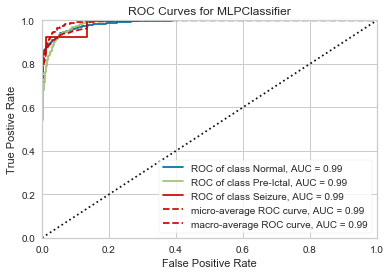

In [6]:
# Plot ROC, AUC.
classes=["Normal","Pre-Ictal","Seizure"]
visualizer = ROCAUC(mlp, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

Iteration 1, loss = 0.36638348
Iteration 2, loss = 0.25607374
Iteration 3, loss = 0.21600529
Iteration 4, loss = 0.19661974
Iteration 5, loss = 0.18676429
Iteration 6, loss = 0.17917422
Iteration 7, loss = 0.17341084
Iteration 8, loss = 0.16856754
Iteration 9, loss = 0.16470497
Iteration 10, loss = 0.16113570
Iteration 11, loss = 0.15809339
Iteration 12, loss = 0.15555725
Iteration 13, loss = 0.15314988
Iteration 14, loss = 0.15145479
Iteration 15, loss = 0.14965862
Iteration 16, loss = 0.14806356
Iteration 17, loss = 0.14599863
Iteration 18, loss = 0.14476214
Iteration 19, loss = 0.14360478
Iteration 20, loss = 0.14194466
Iteration 21, loss = 0.14072223
Iteration 22, loss = 0.13997716
Iteration 23, loss = 0.13887746
Iteration 24, loss = 0.13762222
Iteration 25, loss = 0.13688575
Iteration 26, loss = 0.13529189
Iteration 27, loss = 0.13396246
Iteration 28, loss = 0.13353976
Iteration 29, loss = 0.13275356
Iteration 30, loss = 0.13076496
Iteration 31, loss = 0.12980392
Iteration 32, los

Iteration 260, loss = 0.00902615
Iteration 261, loss = 0.00907121
Iteration 262, loss = 0.00936268
Iteration 263, loss = 0.00884862
Iteration 264, loss = 0.00867319
Iteration 265, loss = 0.00852770
Iteration 266, loss = 0.00849651
Iteration 267, loss = 0.00836835
Iteration 268, loss = 0.00837537
Iteration 269, loss = 0.00824232
Iteration 270, loss = 0.00804143
Iteration 271, loss = 0.00806270
Iteration 272, loss = 0.00811088
Iteration 273, loss = 0.00792832
Iteration 274, loss = 0.00765861
Iteration 275, loss = 0.00763129
Iteration 276, loss = 0.00754786
Iteration 277, loss = 0.00759429
Iteration 278, loss = 0.00739580
Iteration 279, loss = 0.00724897
Iteration 280, loss = 0.00715250
Iteration 281, loss = 0.00707605
Iteration 282, loss = 0.00700985
Iteration 283, loss = 0.00696093
Iteration 284, loss = 0.00684406
Iteration 285, loss = 0.00683584
Iteration 286, loss = 0.00683085
Iteration 287, loss = 0.00667594
Iteration 288, loss = 0.00656715
Iteration 289, loss = 0.00647932
Iteration 

Iteration 520, loss = 0.00135517
Iteration 521, loss = 0.00135386
Iteration 522, loss = 0.00134786
Iteration 523, loss = 0.00134744
Iteration 524, loss = 0.00133924
Iteration 525, loss = 0.00134312
Iteration 526, loss = 0.00134215
Iteration 527, loss = 0.00133620
Iteration 528, loss = 0.00132378
Iteration 529, loss = 0.00131974
Iteration 530, loss = 0.00131616
Iteration 531, loss = 0.00131348
Iteration 532, loss = 0.00131091
Iteration 533, loss = 0.00130425
Iteration 534, loss = 0.00130254
Iteration 535, loss = 0.00129684
Iteration 536, loss = 0.00129351
Iteration 537, loss = 0.00129736
Iteration 538, loss = 0.00128455
Iteration 539, loss = 0.00128476
Iteration 540, loss = 0.00127972
Iteration 541, loss = 0.00127463
Iteration 542, loss = 0.00127131
Iteration 543, loss = 0.00126885
Iteration 544, loss = 0.00126365
Iteration 545, loss = 0.00126449
Iteration 546, loss = 0.00126629
Iteration 547, loss = 0.00125746
Iteration 548, loss = 0.00125630
Iteration 549, loss = 0.00124945
Iteration 

Iteration 778, loss = 0.00084616
Iteration 779, loss = 0.00084368
Iteration 780, loss = 0.00084460
Iteration 781, loss = 0.00084224
Iteration 782, loss = 0.00084160
Iteration 783, loss = 0.00084271
Iteration 784, loss = 0.00084037
Iteration 785, loss = 0.00083975
Iteration 786, loss = 0.00083691
Iteration 787, loss = 0.00083496
Iteration 788, loss = 0.00083519
Iteration 789, loss = 0.00083555
Iteration 790, loss = 0.00083230
Iteration 791, loss = 0.00083391
Iteration 792, loss = 0.00082874
Iteration 793, loss = 0.00082768
Iteration 794, loss = 0.00082858
Iteration 795, loss = 0.00082571
Iteration 796, loss = 0.00082745
Iteration 797, loss = 0.00082713
Iteration 798, loss = 0.00082412
Iteration 799, loss = 0.00082181
Iteration 800, loss = 0.00082054
Iteration 801, loss = 0.00081888
Iteration 802, loss = 0.00082069
Iteration 803, loss = 0.00081715
Iteration 804, loss = 0.00081594
Iteration 805, loss = 0.00081368
Iteration 806, loss = 0.00081329
Iteration 807, loss = 0.00081570
Iteration 

Iteration 15, loss = 0.14917321
Iteration 16, loss = 0.14748215
Iteration 17, loss = 0.14615543
Iteration 18, loss = 0.14518947
Iteration 19, loss = 0.14263787
Iteration 20, loss = 0.14169727
Iteration 21, loss = 0.13984941
Iteration 22, loss = 0.13876908
Iteration 23, loss = 0.13687758
Iteration 24, loss = 0.13551036
Iteration 25, loss = 0.13422434
Iteration 26, loss = 0.13398576
Iteration 27, loss = 0.13077629
Iteration 28, loss = 0.13077887
Iteration 29, loss = 0.12868185
Iteration 30, loss = 0.12758821
Iteration 31, loss = 0.12599436
Iteration 32, loss = 0.12507060
Iteration 33, loss = 0.12397806
Iteration 34, loss = 0.12208397
Iteration 35, loss = 0.12147248
Iteration 36, loss = 0.12021349
Iteration 37, loss = 0.11944404
Iteration 38, loss = 0.11839392
Iteration 39, loss = 0.11722339
Iteration 40, loss = 0.11548516
Iteration 41, loss = 0.11442792
Iteration 42, loss = 0.11331870
Iteration 43, loss = 0.11373549
Iteration 44, loss = 0.11334843
Iteration 45, loss = 0.11075633
Iteratio

Iteration 272, loss = 0.00731920
Iteration 273, loss = 0.00724004
Iteration 274, loss = 0.00707182
Iteration 275, loss = 0.00694180
Iteration 276, loss = 0.00689216
Iteration 277, loss = 0.00679389
Iteration 278, loss = 0.00675870
Iteration 279, loss = 0.00674627
Iteration 280, loss = 0.00664679
Iteration 281, loss = 0.00674982
Iteration 282, loss = 0.00653881
Iteration 283, loss = 0.00653018
Iteration 284, loss = 0.00636736
Iteration 285, loss = 0.00623216
Iteration 286, loss = 0.00623075
Iteration 287, loss = 0.00614420
Iteration 288, loss = 0.00609679
Iteration 289, loss = 0.00609548
Iteration 290, loss = 0.00591487
Iteration 291, loss = 0.00588222
Iteration 292, loss = 0.00586436
Iteration 293, loss = 0.00597485
Iteration 294, loss = 0.00578485
Iteration 295, loss = 0.00562609
Iteration 296, loss = 0.00562624
Iteration 297, loss = 0.00556446
Iteration 298, loss = 0.00555680
Iteration 299, loss = 0.00543004
Iteration 300, loss = 0.00536370
Iteration 301, loss = 0.00527992
Iteration 

Iteration 531, loss = 0.00132639
Iteration 532, loss = 0.00132169
Iteration 533, loss = 0.00131988
Iteration 534, loss = 0.00132076
Iteration 535, loss = 0.00131019
Iteration 536, loss = 0.00130903
Iteration 537, loss = 0.00130152
Iteration 538, loss = 0.00129730
Iteration 539, loss = 0.00129679
Iteration 540, loss = 0.00129329
Iteration 541, loss = 0.00129117
Iteration 542, loss = 0.00128900
Iteration 543, loss = 0.00127971
Iteration 544, loss = 0.00128126
Iteration 545, loss = 0.00128077
Iteration 546, loss = 0.00128195
Iteration 547, loss = 0.00127516
Iteration 548, loss = 0.00126339
Iteration 549, loss = 0.00126114
Iteration 550, loss = 0.00125914
Iteration 551, loss = 0.00125585
Iteration 552, loss = 0.00125219
Iteration 553, loss = 0.00125450
Iteration 554, loss = 0.00124914
Iteration 555, loss = 0.00124431
Iteration 556, loss = 0.00124143
Iteration 557, loss = 0.00124171
Iteration 558, loss = 0.00123574
Iteration 559, loss = 0.00123240
Iteration 560, loss = 0.00122848
Iteration 

Iteration 789, loss = 0.00084675
Iteration 790, loss = 0.00084682
Iteration 791, loss = 0.00084577
Iteration 792, loss = 0.00084854
Iteration 793, loss = 0.00084654
Iteration 794, loss = 0.00084246
Iteration 795, loss = 0.00084351
Iteration 796, loss = 0.00084486
Iteration 797, loss = 0.00084125
Iteration 798, loss = 0.00084074
Iteration 799, loss = 0.00084147
Iteration 800, loss = 0.00084238
Iteration 801, loss = 0.00084189
Iteration 802, loss = 0.00083292
Iteration 803, loss = 0.00083186
Iteration 804, loss = 0.00082855
Iteration 805, loss = 0.00082792
Iteration 806, loss = 0.00082774
Iteration 807, loss = 0.00082561
Iteration 808, loss = 0.00082593
Iteration 809, loss = 0.00082600
Iteration 810, loss = 0.00082368
Iteration 811, loss = 0.00082334
Iteration 812, loss = 0.00082088
Iteration 813, loss = 0.00082083
Iteration 814, loss = 0.00081888
Iteration 815, loss = 0.00081926
Iteration 816, loss = 0.00081697
Iteration 817, loss = 0.00081937
Iteration 818, loss = 0.00081582
Iteration 

Iteration 69, loss = 0.00103952
Iteration 70, loss = 0.00101445
Iteration 71, loss = 0.00099241
Iteration 72, loss = 0.00097049
Iteration 73, loss = 0.00094972
Iteration 74, loss = 0.00092977
Iteration 75, loss = 0.00091115
Iteration 76, loss = 0.00089119
Iteration 77, loss = 0.00087377
Iteration 78, loss = 0.00085665
Iteration 79, loss = 0.00083971
Iteration 80, loss = 0.00082368
Iteration 81, loss = 0.00080825
Iteration 82, loss = 0.00079356
Iteration 83, loss = 0.00077872
Iteration 84, loss = 0.00076450
Iteration 85, loss = 0.00075070
Iteration 86, loss = 0.00073802
Iteration 87, loss = 0.00072566
Iteration 88, loss = 0.00071261
Iteration 89, loss = 0.00070105
Iteration 90, loss = 0.00069002
Iteration 91, loss = 0.00067932
Iteration 92, loss = 0.00066820
Iteration 93, loss = 0.00065727
Iteration 94, loss = 0.00064701
Iteration 95, loss = 0.00063706
Iteration 96, loss = 0.00062746
Iteration 97, loss = 0.00061810
Iteration 98, loss = 0.00060968
Iteration 99, loss = 0.00060045
Iteratio

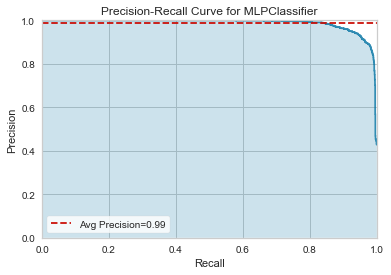

In [7]:
# Plot the precision-recall curve.
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
# Create the visualizer, fit, score, and poof it
viz = PrecisionRecallCurve(mlp)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()

Iteration 1, loss = 0.98914479
Iteration 2, loss = 0.60501746
Iteration 3, loss = 0.40227261
Iteration 4, loss = 0.29295680
Iteration 5, loss = 0.18429444
Iteration 6, loss = 0.13152220
Iteration 7, loss = 0.11077956
Iteration 8, loss = 0.09653206
Iteration 9, loss = 0.08151748
Iteration 10, loss = 0.06419769
Iteration 11, loss = 0.05062338
Iteration 12, loss = 0.03955554
Iteration 13, loss = 0.02895702
Iteration 14, loss = 0.02467639
Iteration 15, loss = 0.02323019
Iteration 16, loss = 0.02199423
Iteration 17, loss = 0.02094098
Iteration 18, loss = 0.02000995
Iteration 19, loss = 0.01917867
Iteration 20, loss = 0.01841893
Iteration 21, loss = 0.01767025
Iteration 22, loss = 0.01679624
Iteration 23, loss = 0.01566671
Iteration 24, loss = 0.01499650
Iteration 25, loss = 0.01461147
Iteration 26, loss = 0.01425613
Iteration 27, loss = 0.01392437
Iteration 28, loss = 0.01361338
Iteration 29, loss = 0.01331963
Iteration 30, loss = 0.01304133
Iteration 31, loss = 0.01277631
Iteration 32, los

Iteration 10, loss = 0.23998781
Iteration 11, loss = 0.23411021
Iteration 12, loss = 0.22857071
Iteration 13, loss = 0.22802870
Iteration 14, loss = 0.23329716
Training loss did not improve more than tol=0.000001 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.60282308
Iteration 2, loss = 0.87952455
Iteration 3, loss = 0.64538156
Iteration 4, loss = 0.56976848
Iteration 5, loss = 0.54330499
Iteration 6, loss = 0.53469996
Iteration 7, loss = 0.54573685
Iteration 8, loss = 0.54122495
Iteration 9, loss = 0.54499220
Iteration 10, loss = 0.54020513
Iteration 11, loss = 0.54547513
Iteration 12, loss = 0.54152425
Iteration 13, loss = 0.53832408
Iteration 14, loss = 0.54255984
Iteration 15, loss = 0.54565264
Iteration 16, loss = 0.54427826
Iteration 17, loss = 0.54270859
Training loss did not improve more than tol=0.000001 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.14167474
Iteration 2, loss = 0.76096878
Iteration 3, loss = 0.72679666
Iteration 4, loss = 0.66966502
I

Iteration 6, loss = 0.07638405
Iteration 7, loss = 0.07043136
Iteration 8, loss = 0.06630272
Iteration 9, loss = 0.06340459
Iteration 10, loss = 0.06128150
Iteration 11, loss = 0.05731906
Iteration 12, loss = 0.05253110
Iteration 13, loss = 0.05129151
Iteration 14, loss = 0.04933782
Iteration 15, loss = 0.04961606
Iteration 16, loss = 0.04896101
Iteration 17, loss = 0.04898397
Iteration 18, loss = 0.04914475
Iteration 19, loss = 0.04905056
Iteration 20, loss = 0.04761962
Iteration 21, loss = 0.04863082
Iteration 22, loss = 0.04914035
Iteration 23, loss = 0.05057448
Iteration 24, loss = 0.05133748
Iteration 25, loss = 0.05148829
Iteration 26, loss = 0.05095073
Iteration 27, loss = 0.04921594
Iteration 28, loss = 0.04829419
Iteration 29, loss = 0.04782871
Iteration 30, loss = 0.05009857
Iteration 31, loss = 0.04954770
Training loss did not improve more than tol=0.000001 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.37132438
Iteration 2, loss = 0.26730766
Iteration 3, loss = 

Iteration 7, loss = 0.04577198
Iteration 8, loss = 0.03714102
Iteration 9, loss = 0.03666428
Iteration 10, loss = 0.03630520
Iteration 11, loss = 0.03610384
Iteration 12, loss = 0.03605764
Iteration 13, loss = 0.03583160
Iteration 14, loss = 0.03575426
Iteration 15, loss = 0.03569349
Iteration 16, loss = 0.03564316
Iteration 17, loss = 0.03555149
Iteration 18, loss = 0.03551131
Iteration 19, loss = 0.03542118
Iteration 20, loss = 0.03516602
Iteration 21, loss = 0.03544117
Iteration 22, loss = 0.03539778
Iteration 23, loss = 0.03536333
Iteration 24, loss = 0.03536056
Iteration 25, loss = 0.03507324
Iteration 26, loss = 0.03550026
Iteration 27, loss = 0.03579106
Iteration 28, loss = 0.03577213
Iteration 29, loss = 0.03574941
Iteration 30, loss = 0.03571097
Iteration 31, loss = 0.03567179
Iteration 32, loss = 0.03574184
Iteration 33, loss = 0.03562375
Iteration 34, loss = 0.03559262
Iteration 35, loss = 0.03555825
Iteration 36, loss = 0.03551194
Training loss did not improve more than tol

Iteration 27, loss = 0.66599875
Training loss did not improve more than tol=0.000001 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.75974240
Iteration 2, loss = 0.71866393
Iteration 3, loss = 0.71277696
Iteration 4, loss = 0.68159163
Iteration 5, loss = 0.71052153
Iteration 6, loss = 0.71849876
Iteration 7, loss = 0.71062522
Iteration 8, loss = 0.70553483
Iteration 9, loss = 0.70750164
Iteration 10, loss = 0.70686279
Iteration 11, loss = 0.71232387
Iteration 12, loss = 0.71991590
Iteration 13, loss = 0.72705363
Iteration 14, loss = 0.71808348
Iteration 15, loss = 0.71364728
Training loss did not improve more than tol=0.000001 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.78579978
Iteration 2, loss = 0.74008817
Iteration 3, loss = 0.65907004
Iteration 4, loss = 0.67268184
Iteration 5, loss = 0.73845581
Iteration 6, loss = 0.72926272
Iteration 7, loss = 0.72052131
Iteration 8, loss = 0.71727967
Iteration 9, loss = 0.72114265
Iteration 10, loss = 0.71829773
Iterat

Iteration 31, loss = 0.04213426
Iteration 32, loss = 0.04232617
Iteration 33, loss = 0.04267839
Iteration 34, loss = 0.04234663
Iteration 35, loss = 0.04200560
Iteration 36, loss = 0.04223344
Iteration 37, loss = 0.04228761
Iteration 38, loss = 0.04224948
Iteration 39, loss = 0.04202477
Iteration 40, loss = 0.04192895
Iteration 41, loss = 0.04138489
Iteration 42, loss = 0.04138484
Iteration 43, loss = 0.04104172
Iteration 44, loss = 0.04126342
Iteration 45, loss = 0.04091456
Iteration 46, loss = 0.04063067
Iteration 47, loss = 0.04120672
Iteration 48, loss = 0.04119159
Iteration 49, loss = 0.04119205
Iteration 50, loss = 0.04115637
Iteration 51, loss = 0.04115274
Iteration 52, loss = 0.04114448
Iteration 53, loss = 0.04113372
Iteration 54, loss = 0.04111896
Iteration 55, loss = 0.04141695
Iteration 56, loss = 0.04162581
Iteration 57, loss = 0.04160562
Training loss did not improve more than tol=0.000001 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.67632874
Iteration 2, lo

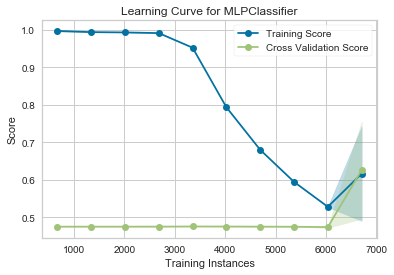

In [21]:
# Plot learning curve.
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import StratifiedKFold
# cv = KFold(12)
cv = StratifiedKFold(4)
sizes = np.linspace(0.1,1.0,10)

viz = LearningCurve(mlp, cv=cv, train_sizes=sizes, n_jobs=1)
viz.fit(X, y)
viz.poof()